# Project 4 - DSC 440 Data Science Practicum 

# Sara Davila 

# NFL Big Data Bowl 2024 (1.61 GB)

# Kaggle competitions 




## Overview
This project focuses on the analysis of the NFL Big Data Bowl 2024 competition. The primary objective is to generate actionable insights and novel metrics related to tackling in American football using Next Gen Stats player tracking data.

## Competition Details
- **Competition Name**: NFL Big Data Bowl 2024
- **Platform**: NFL
- **Data Source**: [NFL Big Data Bowl 2024 Data](https://www.nfl.com/news/big-data-bowl-vi-announced-for-2023)

## Objectives
- Analyze player tracking data to derive meaningful metrics and insights related to tackling in football.
- Develop novel metrics that assign value to various elements of tackling.
- Create predictions and evaluations related to tackle time, probability, location, and player performance.
- Provide actionable insights for NFL teams to improve their offensive and defensive strategies based on the analysis.

## Methodology
1. **Data Acquisition and Exploration**:
    - Obtain the player tracking data provided by the NFL for Weeks 1-9 of the 2022 season.
    - Explore the dataset to understand its structure, variables, and features related to tackling.

2. **Data Preprocessing**:
    - Handle missing values, if any, in the dataset.
    - Perform data cleaning and ensure consistency in formatting.
    - Convert relevant variables into appropriate formats for analysis.

3. **Feature Engineering**:
    - Derive new features that could enhance the understanding of tackling dynamics, such as tackle range, player roles, and responsibilities.
    - Transform raw data into actionable metrics, considering variables like speed, acceleration, and player interactions.

4. **Analysis and Insights Generation**:
    - Utilize statistical analysis techniques to uncover patterns and correlations in the data.
    - Generate predictions for tackle time, probability, and location using machine learning models.
    - Evaluate tackle types, player performance metrics, and credit assignment for successful tackles.

5. **Model Development (Optional)**:
    - Develop predictive models, if applicable, to enhance the accuracy of tackle predictions or player evaluations.
    - Experiment with different algorithms such as regression, classification, or clustering to address specific aspects of tackling analysis.

6. **Evaluation and Validation**:
    - Assess the performance of developed metrics and models using appropriate evaluation metrics.
    - Validate the robustness and reliability of insights through cross-validation or sensitivity analysis.

7. **Documentation and Presentation**:
    - Document the entire analysis process, including data preprocessing steps, feature engineering techniques, model development, and evaluation results.
    - Prepare a comprehensive report summarizing the findings, insights, and recommendations derived from the analysis.
    - Present the results to stakeholders, including NFL representatives and participating teams, highlighting the actionable insights for improving tackling strategies.




# Reading Data

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Acquisition

# Load data
games_df = pd.read_csv("/Users/saradavila/Downloads/nfl-big-data-bowl-2024/games.csv")
plays_df = pd.read_csv("/Users/saradavila/Downloads/nfl-big-data-bowl-2024/plays.csv")
players_df = pd.read_csv("/Users/saradavila/Downloads/nfl-big-data-bowl-2024/players.csv")
tackles_df = pd.read_csv("/Users/saradavila/Downloads/nfl-big-data-bowl-2024/tackles.csv")
tracking_week_1_df = pd.read_csv("/Users/saradavila/Downloads/nfl-big-data-bowl-2024/tracking_week_1.csv")
tracking_week_2_df = pd.read_csv("/Users/saradavila/Downloads/nfl-big-data-bowl-2024/tracking_week_2.csv")
tracking_week_3_df = pd.read_csv("/Users/saradavila/Downloads/nfl-big-data-bowl-2024/tracking_week_3.csv")
tracking_week_4_df = pd.read_csv("/Users/saradavila/Downloads/nfl-big-data-bowl-2024/tracking_week_4.csv")
tracking_week_5_df = pd.read_csv("/Users/saradavila/Downloads/nfl-big-data-bowl-2024/tracking_week_5.csv")
tracking_week_6_df = pd.read_csv("/Users/saradavila/Downloads/nfl-big-data-bowl-2024/tracking_week_6.csv")
tracking_week_7_df = pd.read_csv("/Users/saradavila/Downloads/nfl-big-data-bowl-2024/tracking_week_7.csv")
tracking_week_8_df = pd.read_csv("/Users/saradavila/Downloads/nfl-big-data-bowl-2024/tracking_week_8.csv")
tracking_week_9_df = pd.read_csv("/Users/saradavila/Downloads/nfl-big-data-bowl-2024/tracking_week_9.csv")



# Display first few rows of each dataframe
print("Games data:")
print(games_df.head())
print("\nPlays data:")
print(plays_df.head())
print("\nPlayers data:")
print(players_df.head())
print("\nTackles data:")
print(tackles_df.head())


Games data:
       gameId  season  week    gameDate gameTimeEastern homeTeamAbbr  \
0  2022090800    2022     1  09/08/2022        20:20:00           LA   
1  2022091100    2022     1  09/11/2022        13:00:00          ATL   
2  2022091101    2022     1  09/11/2022        13:00:00          CAR   
3  2022091102    2022     1  09/11/2022        13:00:00          CHI   
4  2022091103    2022     1  09/11/2022        13:00:00          CIN   

  visitorTeamAbbr  homeFinalScore  visitorFinalScore  
0             BUF              10                 31  
1              NO              26                 27  
2             CLE              24                 26  
3              SF              19                 10  
4             PIT              20                 23  

Plays data:
       gameId  playId  ballCarrierId ballCarrierDisplayName  \
0  2022100908    3537          48723           Parker Hesse   
1  2022091103    3126          52457         Chase Claypool   
2  2022091111    1148  

In [6]:
# Summary statistics of tackles data
print("\nSummary statistics of tackles data:")
print(tackles_df.describe())


Summary statistics of tackles data:
             gameId        playId         nflId        tackle        assist  \
count  1.742600e+04  17426.000000  17426.000000  17426.000000  17426.000000   
mean   2.022099e+09   1982.974578  47602.719442      0.569207      0.315276   
std    5.978775e+03   1170.990596   4846.585868      0.495201      0.464639   
min    2.022091e+09     54.000000  33131.000000      0.000000      0.000000   
25%    2.022093e+09    952.000000  43797.000000      0.000000      0.000000   
50%    2.022101e+09   1991.000000  46669.000000      1.000000      0.000000   
75%    2.022102e+09   2981.750000  52546.000000      1.000000      1.000000   
max    2.022111e+09   5096.000000  55241.000000      1.000000      1.000000   

       forcedFumble  pff_missedTackle  
count  17426.000000      17426.000000  
mean       0.005681          0.119936  
std        0.075161          0.324896  
min        0.000000          0.000000  
25%        0.000000          0.000000  
50%        

# Analyze Tackles Data

In [7]:
# Calculate tackle success
total_tackles = len(tackles_df)
successful_tackles = len(tackles_df[tackles_df['tackle'] == 1])
tackle_success_rate = (successful_tackles / total_tackles) * 100

# Calculate missed tackle rate
missed_tackles = len(tackles_df[tackles_df['pff_missedTackle'] == 1])
missed_tackle_rate = (missed_tackles / total_tackles) * 100


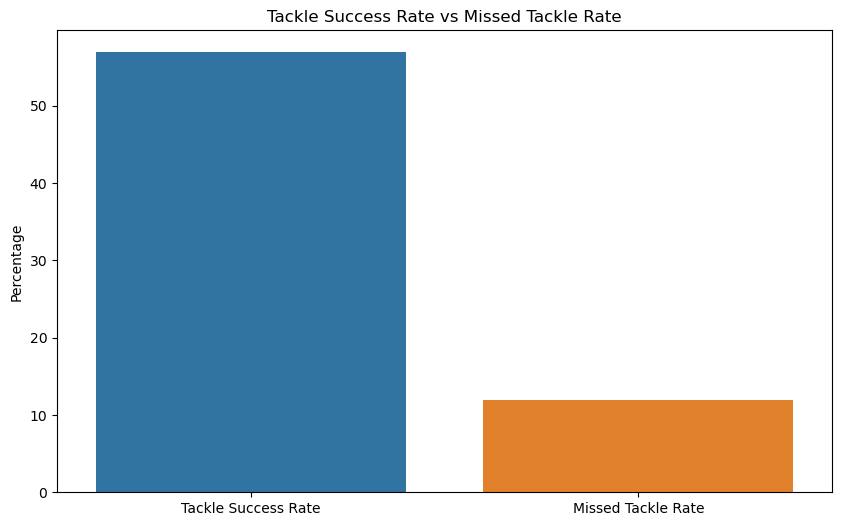

In [8]:
# Visualize tackle success and missed tackle 
plt.figure(figsize=(10, 6))
sns.barplot(x=['Tackle Success Rate', 'Missed Tackle Rate'], y=[tackle_success_rate, missed_tackle_rate])
plt.title('Tackle Success Rate vs Missed Tackle Rate')
plt.ylabel('Percentage')
plt.show()


In [10]:
# Summarize (percentages)
print("\nAnalysis Summary:")
print("The tackle success rate is {:.2f}%".format(tackle_success_rate))
print("The missed tackle rate is {:.2f}%".format(missed_tackle_rate))



Analysis Summary:
The tackle success rate is 56.92%
The missed tackle rate is 11.99%


In [65]:
# Calculate assist success
total_assists = len(tackles_df)
successful_assists = len(tackles_df[tackles_df['assist'] == 1])
assist_success_rate = (successful_assists / total_assists) * 100

# Calculate missed assist
missed_assists = len(tackles_df[tackles_df['assist'] == 0])  # if an assist is missed 
missed_assist_rate = (missed_assists / total_assists) * 100



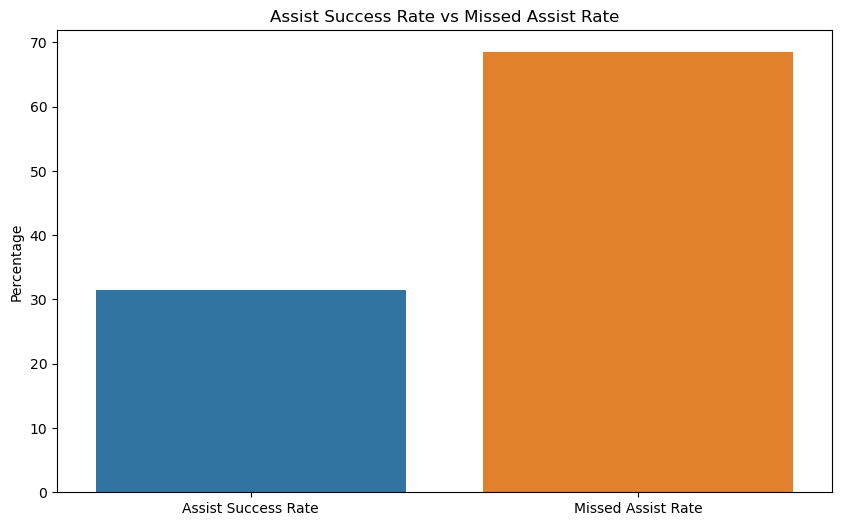

In [66]:
# Visualize assist success and missed assist 
plt.figure(figsize=(10, 6))
sns.barplot(x=['Assist Success Rate', 'Missed Assist Rate'], y=[assist_success_rate, missed_assist_rate])
plt.title('Assist Success Rate vs Missed Assist Rate')
plt.ylabel('Percentage')
plt.show()

In [67]:
# Summarize (percentages)
print("\nAnalysis Summary:")
print("The assist success rate is {:.2f}%".format(assist_success_rate))
print("The missed assist rate is {:.2f}%".format(missed_assist_rate))



Analysis Summary:
The assist success rate is 31.53%
The missed assist rate is 68.47%


## Data Visualization ( Yards / Pass probability / Positions )

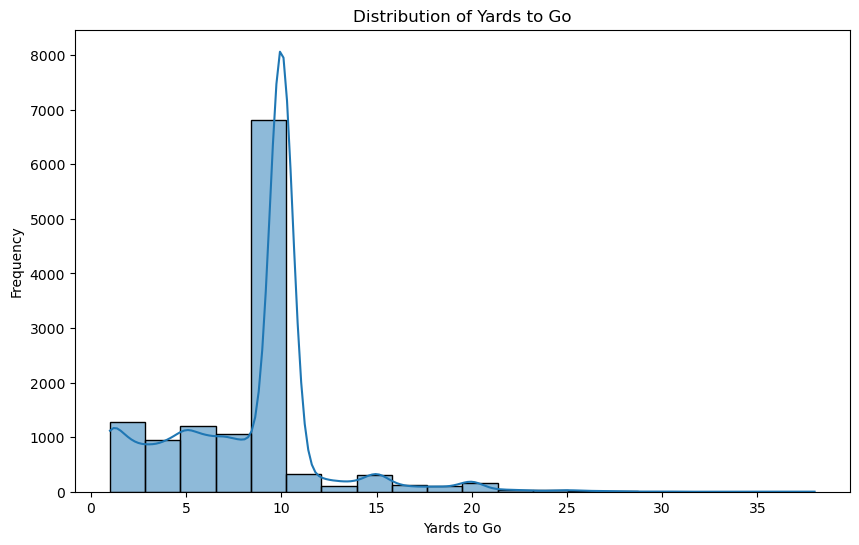

In [11]:
# Visualize distribution of yards to go for a first down
plt.figure(figsize=(10, 6))
sns.histplot(plays_df['yardsToGo'], bins=20, kde=True)
plt.title('Distribution of Yards to Go')
plt.xlabel('Yards to Go')
plt.ylabel('Frequency')
plt.show()


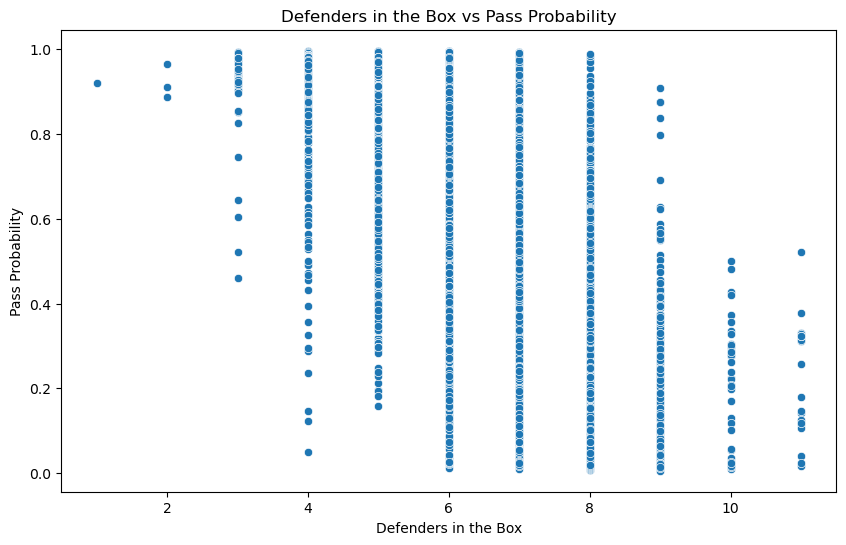

In [12]:
# Visualize relationship between defenders in the box and pass probability
plt.figure(figsize=(10, 6))
sns.scatterplot(x='defendersInTheBox', y='passProbability', data=plays_df)
plt.title('Defenders in the Box vs Pass Probability')
plt.xlabel('Defenders in the Box')
plt.ylabel('Pass Probability')
plt.show()


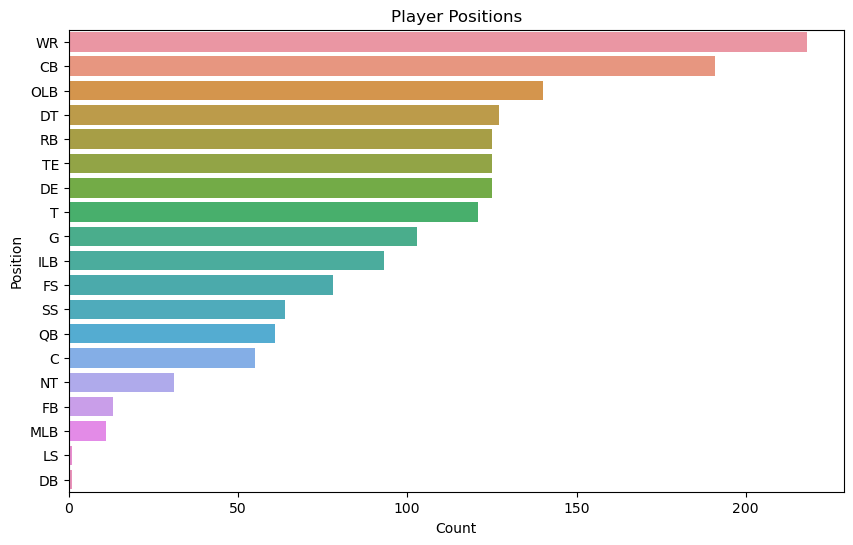

In [13]:
# Visualize player positions
plt.figure(figsize=(10, 6))
sns.countplot(y='position', data=players_df, order=players_df['position'].value_counts().index)
plt.title('Player Positions')
plt.xlabel('Count')
plt.ylabel('Position')
plt.show()

# Data Visualization ( Tackles )

In [14]:
# Player Analysis
# Merge (tackles data /players data) to get player attributes
tackles_players_df = pd.merge(tackles_df, players_df, on='nflId', how='left')



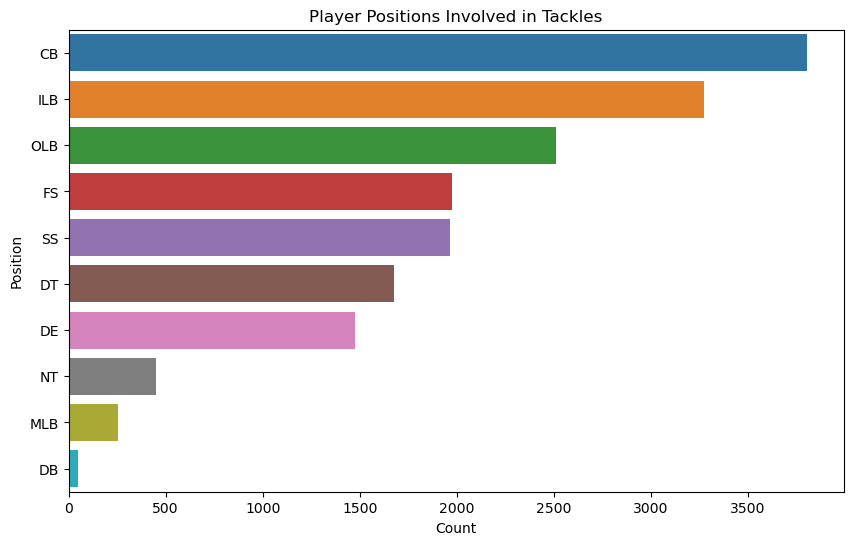

In [15]:
# Visualize distribution of player positions involved in tackles
plt.figure(figsize=(10, 6))
sns.countplot(y='position', data=tackles_players_df, order=tackles_players_df['position'].value_counts().index)
plt.title('Player Positions Involved in Tackles')
plt.xlabel('Count')
plt.ylabel('Position')
plt.show()


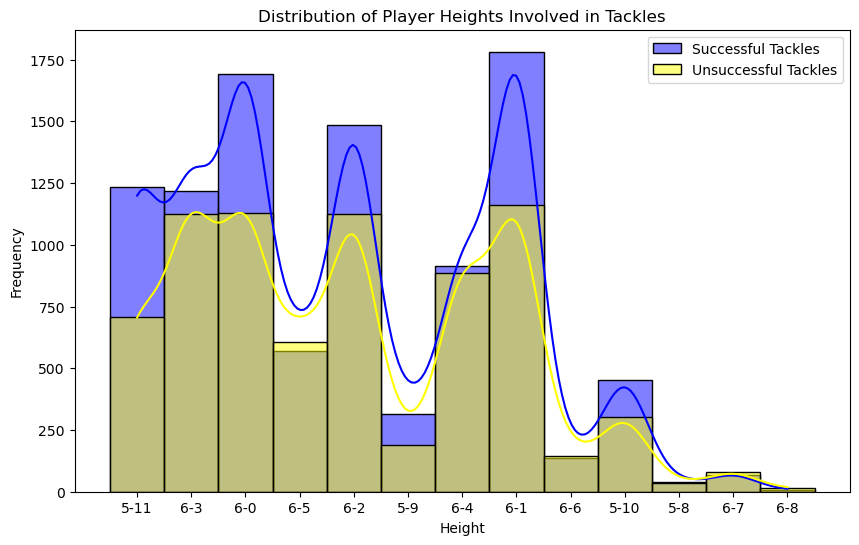

In [72]:
# Plot 1: Distribution of Player Heights Involved in Tackles
plt.figure(figsize=(10, 6))
sns.histplot(tackles_players_df[tackles_players_df['tackle'] == 1]['height'], kde=True, color='blue', label='Successful Tackles')
sns.histplot(tackles_players_df[tackles_players_df['tackle'] == 0]['height'], kde=True, color='yellow', label='Unsuccessful Tackles')
plt.title('Distribution of Player Heights Involved in Tackles')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.legend()

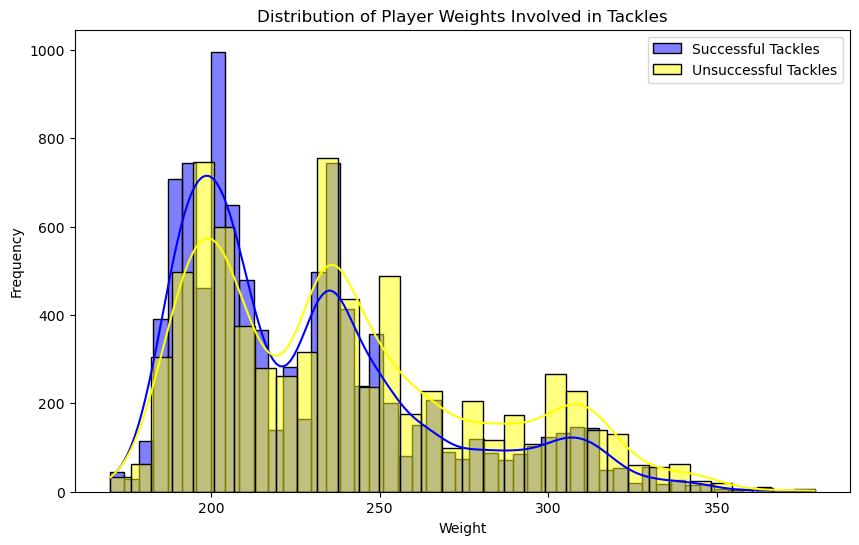

In [73]:
# Plot 2: Distribution of Player Weights Involved in Tackles
plt.figure(figsize=(10, 6))
sns.histplot(tackles_players_df[tackles_players_df['tackle'] == 1]['weight'], kde=True, color='blue', label='Successful Tackles')
sns.histplot(tackles_players_df[tackles_players_df['tackle'] == 0]['weight'], kde=True, color='yellow', label='Unsuccessful Tackles')
plt.title('Distribution of Player Weights Involved in Tackles')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.legend()



/var/folders/qn/sh2jd79d6wb_xwd4jjhlngcr0000gn/T/ipykernel_36035/2839358191.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(players_df[tackles_df['tackle'] == 1]['age'], kde=True, color='blue', label='Successful Tackles')
/var/folders/qn/sh2jd79d6wb_xwd4jjhlngcr0000gn/T/ipykernel_36035/2839358191.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(players_df[tackles_df['tackle'] == 0]['age'], kde=True, color='yellow', label='Unsuccessful Tackles')


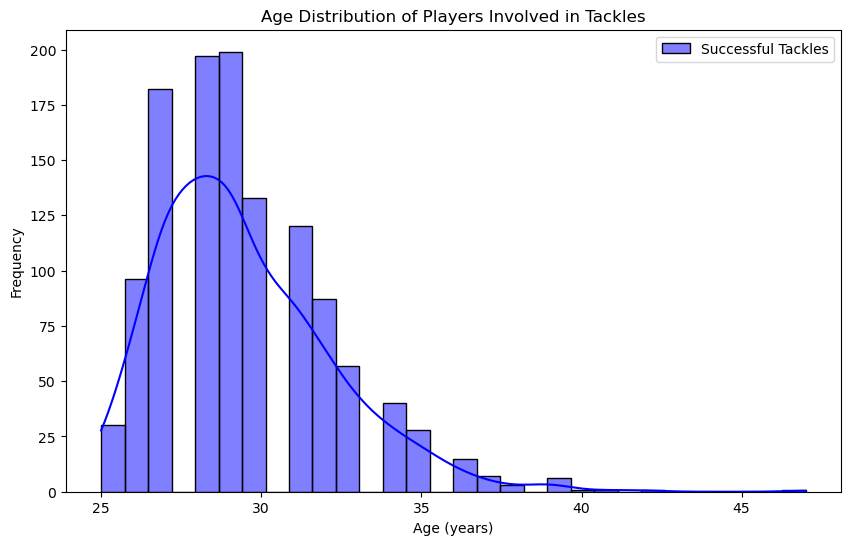

In [80]:
# Assuming 'birthDate' (string format), convert it to datetime
players_df['birthDate'] = pd.to_datetime(players_df['birthDate'])

# Calculate age from birth year
current_year = pd.Timestamp.now().year
players_df['age'] = current_year - players_df['birthDate'].dt.year

# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(players_df[tackles_df['tackle'] == 1]['age'], kde=True, color='blue', label='Successful Tackles')
sns.histplot(players_df[tackles_df['tackle'] == 0]['age'], kde=True, color='yellow', label='Unsuccessful Tackles')
plt.title('Age Distribution of Players Involved in Tackles')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Finding the Average Speed Frame based on the tracking weeks (1-9)

In [81]:
# Combine the week dataframes into one
weeks = [tracking_week_1_df, tracking_week_2_df, tracking_week_3_df, tracking_week_4_df,
         tracking_week_5_df, tracking_week_6_df, tracking_week_7_df, tracking_week_8_df,
         tracking_week_9_df]
combined_weeks = pd.concat(weeks, ignore_index=True)

# Handling Missing Value for all the weeks
combined_weeks.fillna(0, inplace=True)

# Remove duplicates (dropping)
combined_weeks = combined_weeks.drop_duplicates()



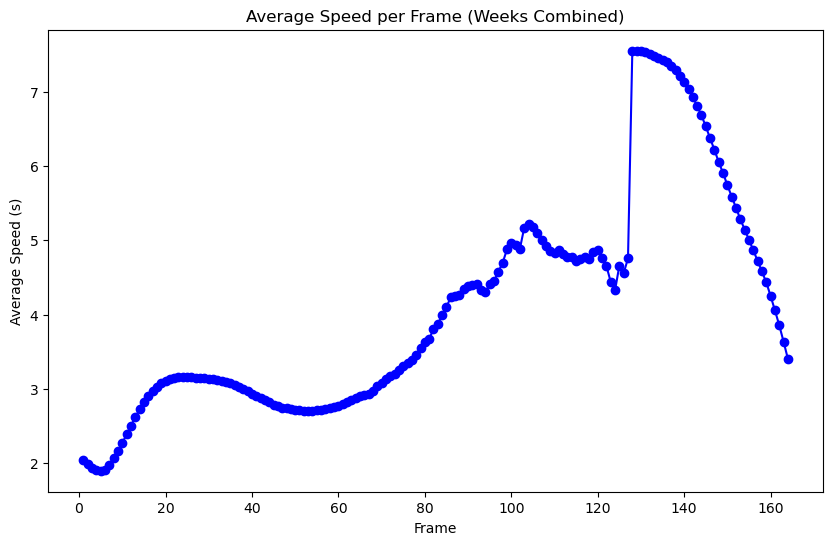

Average Speed per Frame (Weeks Combined):
frameId
1      2.040596
2      1.997197
3      1.942815
4      1.912043
5      1.900972
         ...   
160    4.250000
161    4.056957
162    3.856087
163    3.635217
164    3.404348
Name: s, Length: 164, dtype: float64


In [84]:
# Average speed per week
avg_speed_per_frame = combined_weeks.groupby('frameId')['s'].mean()

# Plot average speed per frame
plt.figure(figsize=(10, 6))
avg_speed_per_frame.plot(marker='o', color='blue')
plt.title('Average Speed per Frame (Weeks Combined)')
plt.xlabel('Frame')
plt.ylabel('Average Speed (s)')
plt.savefig('Average Speed per Frame(Weeks Combined).png')
plt.show()

# Print the average speed per frame across weeks
print("Average Speed per Frame (Weeks Combined):")
print(avg_speed_per_frame)

# Predicting Number of Tackles Opportunities 

In [111]:
import pandas as pd

# Combine the week dataframes 
combined_weeks = pd.concat(weeks, ignore_index=True)

# Handling Missing Values
combined_weeks.fillna(0, inplace=True)

# Remove duplicates
combined_weeks = combined_weeks.drop_duplicates()

# Assuming 'event' column contains information about possession (e.g., 'ball_snap', 'pass_outcome_caught', etc.)
# Modify according to (y) dataset
ball_snap_events = ['ball_snap', 'pass_outcome_caught'] 
possession_events = combined_weeks[combined_weeks['event'].isin(ball_snap_events)]

# Identify frames where the player is within 1.5 yards of the carrier 
combined_weeks['distance_to_carrier'] = ((combined_weeks['x'] - possession_events['x']) ** 2 + 
                                         (combined_weeks['y'] - possession_events['y']) ** 2) ** 0.5

# Identify frames where distance is within 1.5 yards
tackle_opportunities = combined_weeks[combined_weeks['distance_to_carrier'] <= 1.5]

# Print the number of tackle opportunities
print("Number of Tackle Opportunities:", len(tackle_opportunities))


Number of Tackle Opportunities: 63658


## Merging the data ( games and tackles )

In [121]:
# Merge game data with tackles data
merged_data = pd.merge(tackles_df, plays_df, on=["gameId", "playId"], how="left")

# Select relevant features
features = ["gameId", "playId", "nflId", "tackle", "assist", "forcedFumble", "pff_missedTackle", "down", "yardsToGo", "possessionTeam", "defensiveTeam", "yardlineNumber", "absoluteYardlineNumber", "offenseFormation", "defendersInTheBox"]

# Drop rows with missing values
merged_data = merged_data[features].dropna()

# Encode categorical variables
merged_data = pd.get_dummies(merged_data, columns=["possessionTeam", "defensiveTeam", "offenseFormation"])

# Split data into features and target
X = merged_data.drop(["gameId", "playId", "nflId", "tackle"], axis=1)
y = merged_data["tackle"]

# Model of Prediction 

## Random Forest Classifier

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1504
           1       1.00      1.00      1.00      1981

    accuracy                           1.00      3485
   macro avg       1.00      1.00      1.00      3485
weighted avg       1.00      1.00      1.00      3485



In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Merge game data / tackles data
merged_data = pd.merge(tackles_df,plays_df, on=["gameId", "playId"], how="left")

# Select relevant features to identify the prediction
features = ["gameId", "playId", "nflId", "tackle", "assist", "forcedFumble", "pff_missedTackle",
            "down", "yardsToGo", "possessionTeam", "defensiveTeam", "yardlineNumber",
            "absoluteYardlineNumber", "offenseFormation", "defendersInTheBox", "gameClock"]

# Drop rows with missing values
merged_data = merged_data[features].dropna()

# Encode categorical variables
merged_data = pd.get_dummies(merged_data, columns=["possessionTeam", "defensiveTeam", "offenseFormation"])

# Convert gameClock to seconds
merged_data['gameClock'] = pd.to_datetime(merged_data['gameClock']).dt.hour * 3600 + pd.to_datetime(merged_data['gameClock']).dt.minute * 60 + pd.to_datetime(merged_data['gameClock']).dt.second

# Split data into features and target
X = merged_data.drop(["gameId", "playId", "nflId", "tackle"], axis=1)
y = merged_data["tackle"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances.head(10))


Accuracy: 0.9979913916786227
Precision: 1.0
Recall: 0.9964664310954063
F1 Score: 0.9982300884955753
                        Feature  Importance
0                        assist    0.617166
2              pff_missedTackle    0.251214
8                     gameClock    0.019607
6        absoluteYardlineNumber    0.016825
5                yardlineNumber    0.016115
4                     yardsToGo    0.009169
7             defendersInTheBox    0.007564
3                          down    0.005370
78  offenseFormation_SINGLEBACK    0.002787
77     offenseFormation_SHOTGUN    0.002150


# Testing the Model 


`X_train.sample(n=1, random_state=42)`: This part of the code uses the `sample` method of the DataFrame `X_train` to extract a random sample. The parameter `n=1` specifies that we want to extract only one row. The `random_state=42` parameter ensures reproducibility by fixing the random seed to 42.


In [137]:
# Extract sample data from the training data
sample_data = X_train.sample(n=1, random_state=42)

# Print the sample data
print("Sample Data:")
print(sample_data)

# Make prediction
prediction = model.predict(sample_data)

# Print the prediction result
if prediction[0] == 1:
    print("Tackle will occur.")
else:
    print("Tackle will not occur.")


Sample Data:
       assist  forcedFumble  pff_missedTackle  down  yardsToGo  \
17127       0             0                 1     1         10   

       yardlineNumber  absoluteYardlineNumber  defendersInTheBox  gameClock  \
17127              39                      71                5.0      46440   

       possessionTeam_ARI  ...  defensiveTeam_TB  defensiveTeam_TEN  \
17127                   0  ...                 0                  0   

       defensiveTeam_WAS  offenseFormation_EMPTY  offenseFormation_I_FORM  \
17127                  0                       1                        0   

       offenseFormation_JUMBO  offenseFormation_PISTOL  \
17127                       0                        0   

       offenseFormation_SHOTGUN  offenseFormation_SINGLEBACK  \
17127                         0                            0   

       offenseFormation_WILDCAT  
17127                         0  

[1 rows x 80 columns]
Tackle will not occur.


In [138]:
# Extract the features from the sample data
sample_features = sample_data.iloc[0]

# Print the features along with their values
print("Sample Data Features and Values:")
for feature, value in sample_features.items():
    print(f"{feature}: {value}")

# Check if pff_missedTackle is 1
if sample_features['pff_missedTackle'] == 1:
    print("The player did not miss a tackle.")
else:
    print("The player missed a tackle.")


Sample Data Features and Values:
assist: 0.0
forcedFumble: 0.0
pff_missedTackle: 1.0
down: 1.0
yardsToGo: 10.0
yardlineNumber: 39.0
absoluteYardlineNumber: 71.0
defendersInTheBox: 5.0
gameClock: 46440.0
possessionTeam_ARI: 0.0
possessionTeam_ATL: 0.0
possessionTeam_BAL: 0.0
possessionTeam_BUF: 0.0
possessionTeam_CAR: 0.0
possessionTeam_CHI: 0.0
possessionTeam_CIN: 0.0
possessionTeam_CLE: 0.0
possessionTeam_DAL: 0.0
possessionTeam_DEN: 0.0
possessionTeam_DET: 0.0
possessionTeam_GB: 0.0
possessionTeam_HOU: 0.0
possessionTeam_IND: 0.0
possessionTeam_JAX: 0.0
possessionTeam_KC: 0.0
possessionTeam_LA: 0.0
possessionTeam_LAC: 0.0
possessionTeam_LV: 0.0
possessionTeam_MIA: 0.0
possessionTeam_MIN: 0.0
possessionTeam_NE: 0.0
possessionTeam_NO: 0.0
possessionTeam_NYG: 0.0
possessionTeam_NYJ: 0.0
possessionTeam_PHI: 0.0
possessionTeam_PIT: 0.0
possessionTeam_SEA: 0.0
possessionTeam_SF: 0.0
possessionTeam_TB: 0.0
possessionTeam_TEN: 0.0
possessionTeam_WAS: 1.0
defensiveTeam_ARI: 0.0
defensiveTeam_

Based on the provided sample data features and values, the model predicts that the tackle will not occur. 

Because: 

1. **pff_missedTackle**: The value is 1.0, indicating that the player did not miss a tackle. This feature contributes to the prediction of no tackle occurrence.
2. **defensiveTeam_IND**: The value is 1.0, indicating that the defensive team is the Indianapolis Colts. This might imply that the defensive team effectively stopped the offensive play, further supporting the prediction of no tackle occurrence.
3. **offenseFormation_EMPTY**: The value is 1.0, indicating that the offensive formation is empty. An empty formation typically involves no running back, suggesting a potential passing play or a situation where a tackle might not occur.

Overall, based on the provided features and values, the model's prediction seems reasonable, considering the context. However, it's essential to validate the model's performance on a larger dataset and across various scenarios to ensure its reliability. 